# Augmented Data Comparison

In this notebook, different ways to compare the quality of augmented time series are explored.

## 0 Imports and static variables

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from data_helper import DataHelper

In [2]:
DATA_FOLDER = Path("./data")
MULTIVARIATE_DATA_FOLDER = DATA_FOLDER / "multivariate"
UNIVARIATE_DATA_FOLDER = DATA_FOLDER / "univariate"

## 1 Loading data

In [3]:
aapl = pd.read_csv(UNIVARIATE_DATA_FOLDER / "AAPL_open_high_low_close_adjClose_volume.csv")
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


### 1.1 Save data with specific attributes to csv file

In [4]:
# save new aapl time Series with only close column
# aapl_close = aapl[["Close"]]
# aapl_close.to_csv(UNIVARIATE_DATA_FOLDER / "AAPL_close.csv", index=False)

## 2 Plot Data

In [5]:
# transform Date column into datetime object (not necessary here but good practice)
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
aapl.size

25326

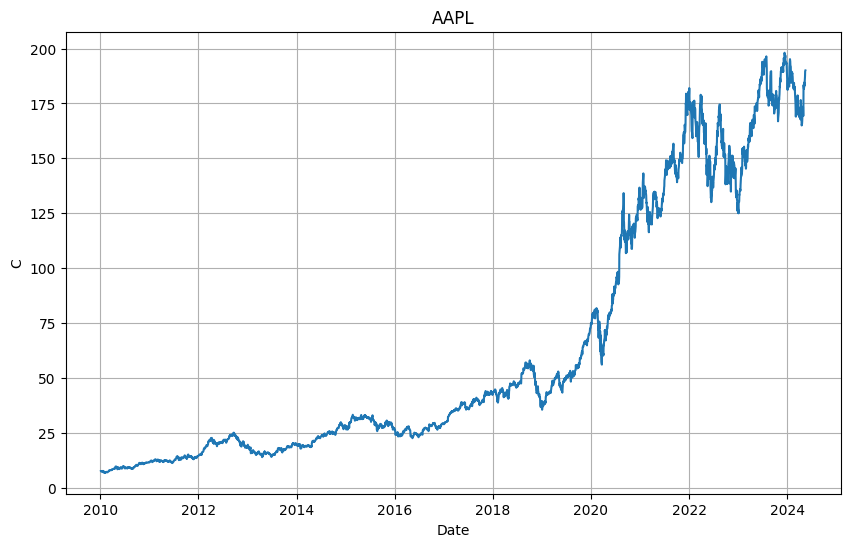

In [7]:
DataHelper.plot_close_price(df=aapl, title="AAPL")

In [8]:
aapl_2022 = aapl.loc["2021":"2022"]
aapl_2022 

,Date,Open,High,Low,Close,Adj Close,Volume
2021,2018-01-12,44.044998,44.3400,43.912498,44.272499,41.754723,101672400
2022,2018-01-16,44.474998,44.8475,44.035000,44.047501,41.542515,118263600


In [9]:
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800
...,...,...,...,...,...,...,...
3613,2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
3614,2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
3615,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
3616,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52800800


In [21]:
aapl_2021 = DataHelper.slice_years(aapl, ["2020", "2022"])
aapl_2021

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650330,132079200
...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967529,69007800
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010117,85438400
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550964,75703700


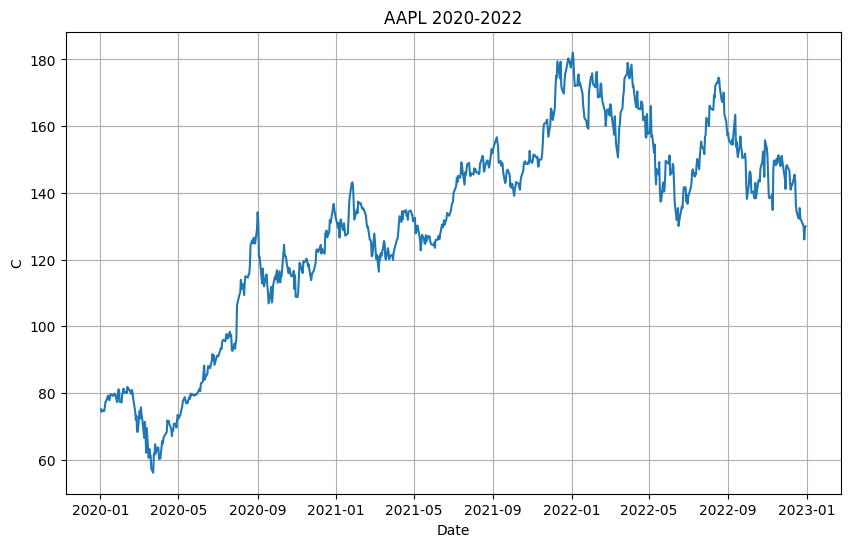

In [22]:
DataHelper.plot_close_price(aapl_2021, "AAPL 2020-2022")

In [16]:
aapl.index

RangeIndex(start=0, stop=3618, step=1)

In [17]:
aapl_2021.index

RangeIndex(start=0, stop=2014, step=1)